This is our implementation for Introduction to intelligent systems CW1, We shall be using the Iris Dataset, the K Nearest Neighbor, Decision tree and Convulated Neural Network algorithms.

**// K-Nearest Neigbor implementation by Hishaam Mehmood**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris # importing the iris dataset
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # importing the KNN classifer library
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # these will be used to design our graphs



In [ ]:
# Loading the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# these are validation parameters
num_iterations = 30
test_size = 0.3
random_state = 42
k_neighbors = 5

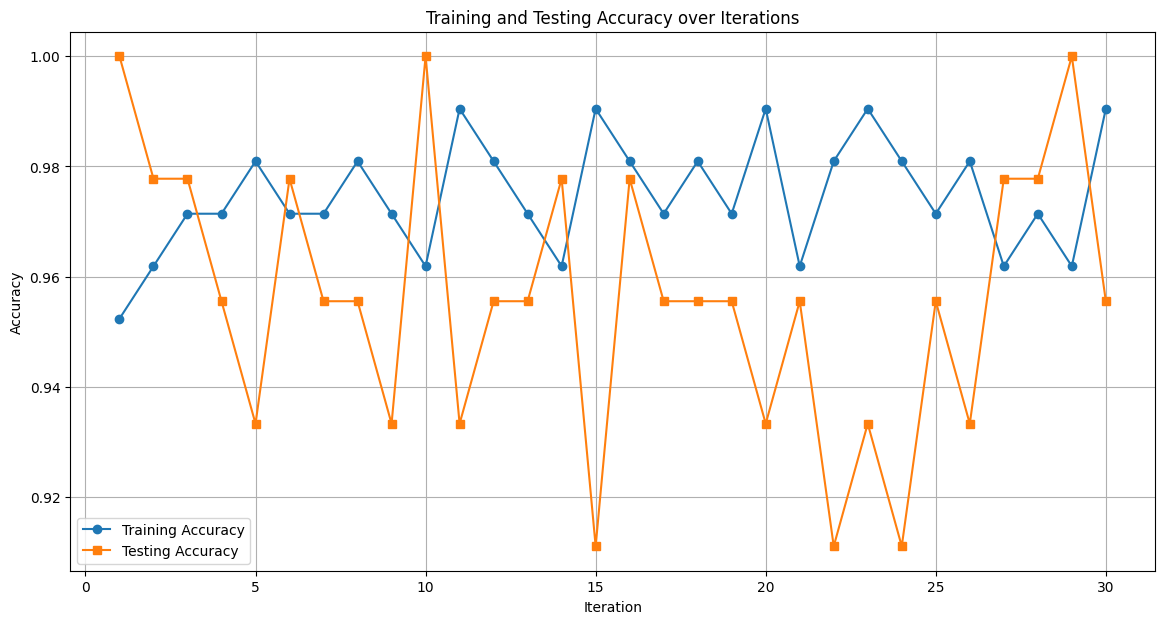

Accuracy: 0.9555555555555556
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Confusion Matrix:
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


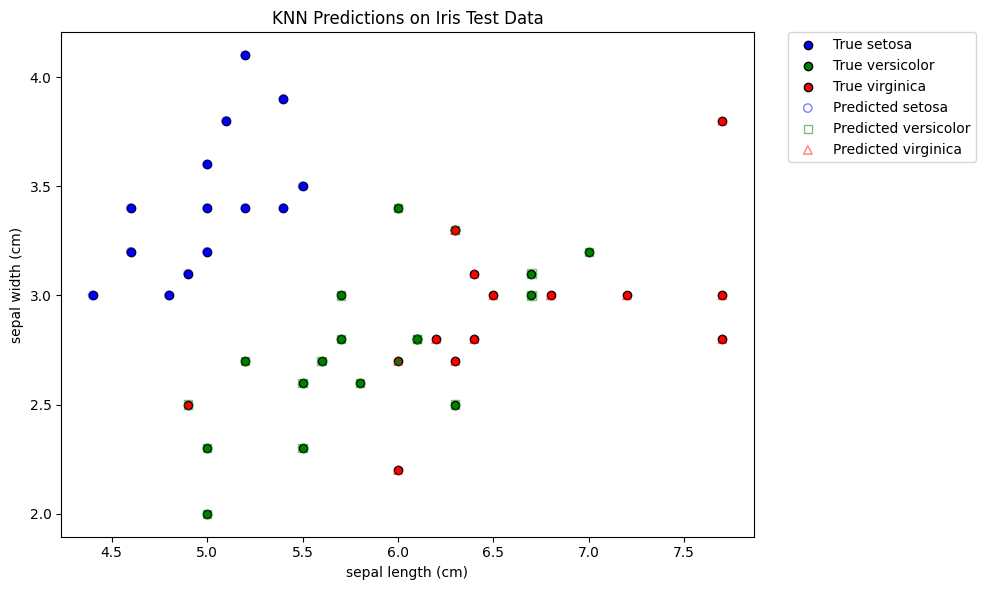

In [ ]:
# Stores the accuracies for each test iteration
train_accuracies = []# s
test_accuracies = []

for i in range(num_iterations):
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state + i)

    # Training the KNN model
    knn = KNeighborsClassifier(n_neighbors=k_neighbors)
    knn.fit(X_train, y_train)

    # Predicting the training set results
    y_train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Predicting the test set results
    y_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Plotting the accuracies
plt.figure(figsize=(14, 7))
plt.plot(range(1, num_iterations + 1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, num_iterations + 1), test_accuracies, label='Testing Accuracy', marker='s')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over Iterations')
plt.legend()
plt.grid(True)
plt.show()

# Training the final model
knn = KNeighborsClassifier(n_neighbors=k_neighbors)
knn.fit(X_train, y_train)

# Predicting the test set results
y_pred = knn.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualising the results using a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot of our true classes of the test data
colors = ['blue', 'green', 'red']
for i, color in zip(range(3), colors):
    idx = np.where(y_test == i)
    plt.scatter(X_test[idx, 0], X_test[idx, 1], c=color, label=f"True {iris.target_names[i]}", edgecolor='black')

# Predicting class scatter plots with different markers
markers = ['o', 's', '^']
for i, marker in zip(range(3), markers):
    idx = np.where(y_pred == i)
    plt.scatter(X_test[idx, 0], X_test[idx, 1], facecolors='none', edgecolors=colors[i], marker=marker, label=f'Predicted {iris.target_names[i]}', alpha=0.5)

# Adding labels, title, and a legend display
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("KNN Predictions on Iris Test Data")
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()


**// Decision tree implementation by Allan Dsouza**








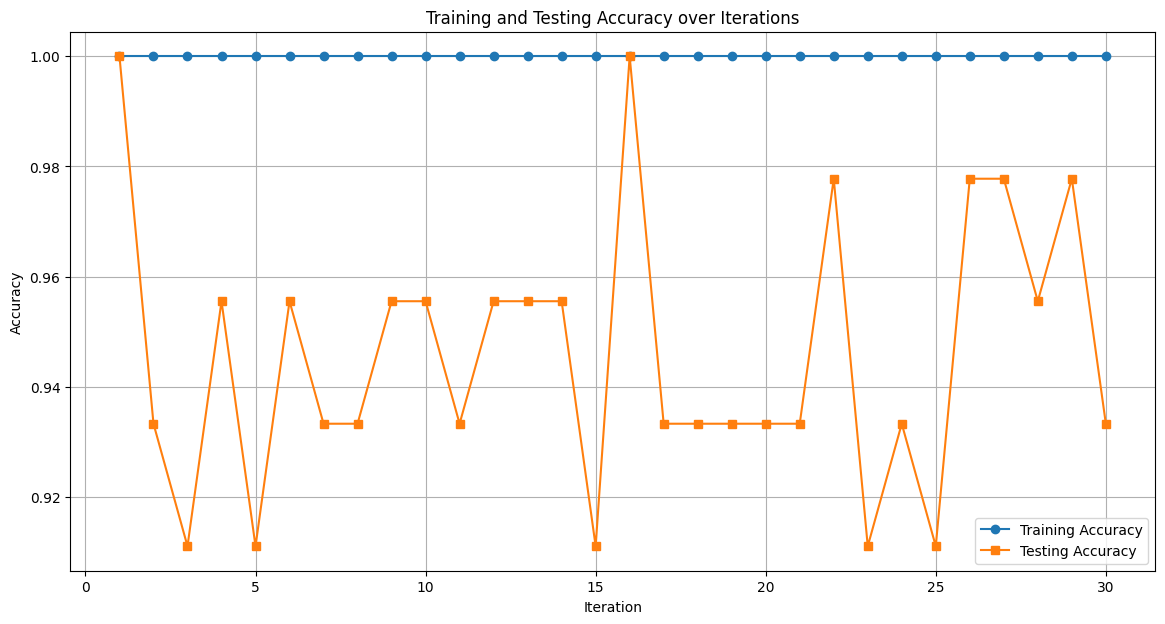

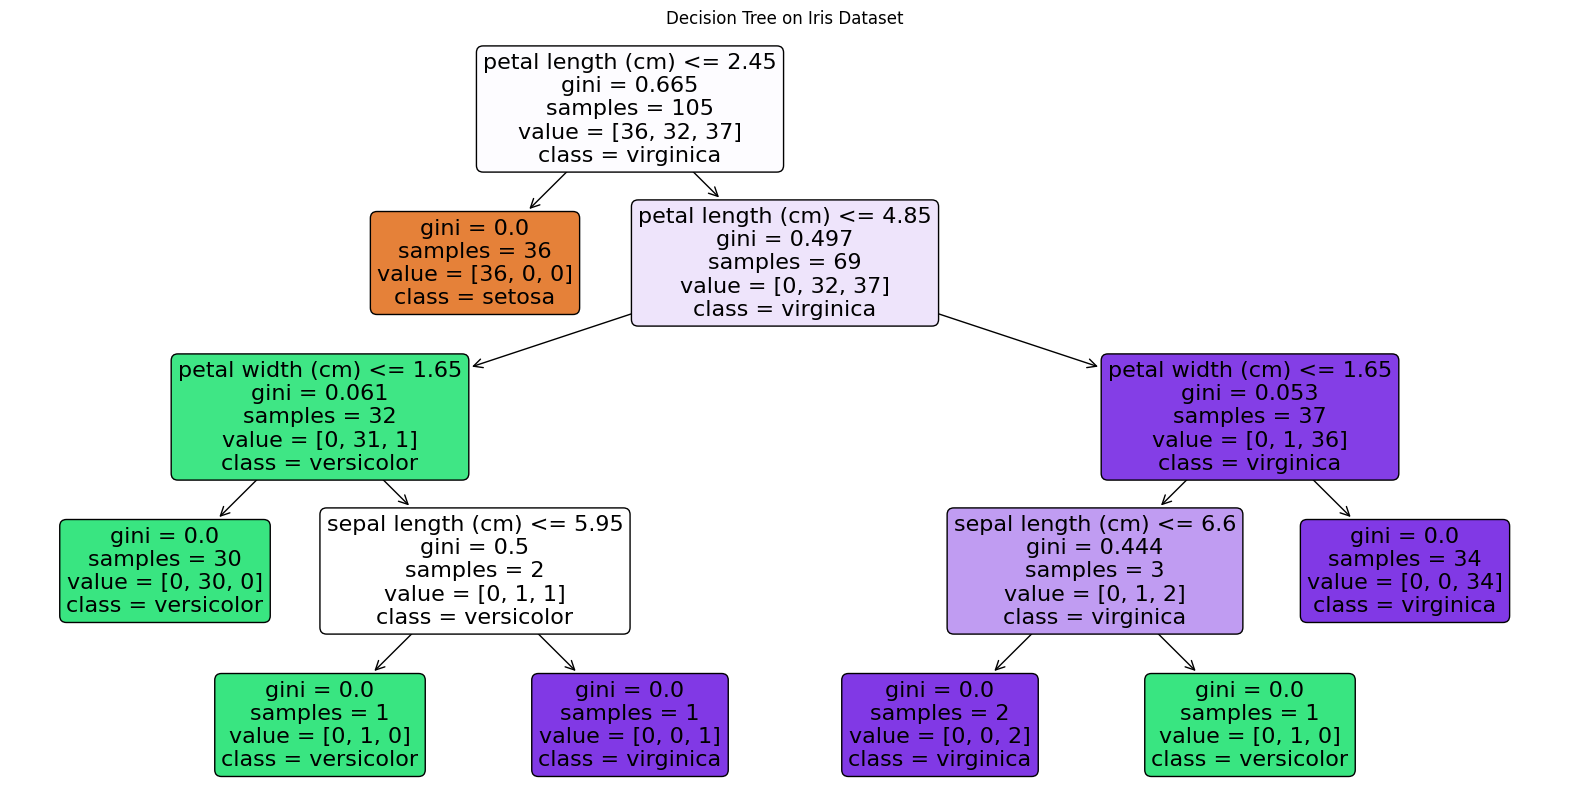

Accuracy: 0.8888888888888888
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.88      0.83      0.86        18
   virginica       0.79      0.85      0.81        13

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45

Confusion Matrix:
[[14  0  0]
 [ 0 15  3]
 [ 0  2 11]]


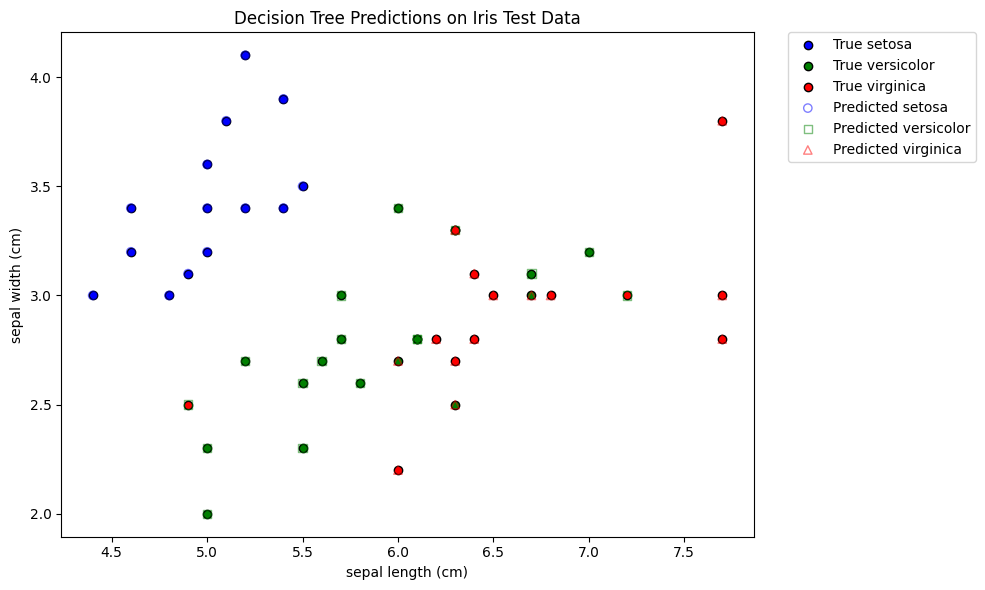

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# These are our parameters for validation
num_iterations = 30
test_size = 0.3
random_state = 42

# Stores the accuracies for each test
train_accuracies = []
test_accuracies = []

for i in range(num_iterations):
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state + i)

    # Training the Decision Tree model
    clf = DecisionTreeClassifier(random_state=random_state + i)
    clf.fit(X_train, y_train)

    # Predicting the training set results
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Predicting the test set results
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Plotting the accuracies
plt.figure(figsize=(14, 7))
plt.plot(range(1, num_iterations + 1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, num_iterations + 1), test_accuracies, label='Testing Accuracy', marker='s')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over Iterations')
plt.legend()
plt.grid(True)
plt.show()

# Training the final model and visualising the Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title("Decision Tree on Iris Dataset")
plt.show()

# Predicting the test set results
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualising the results using a scatter plot
plt.figure(figsize=(10, 6))

# scatter plot of our true classes of the test data
colors = ['blue', 'green', 'red']
for i, color in zip(range(3), colors):
    idx = np.where(y_test == i)
    plt.scatter(X_test[idx, 0], X_test[idx, 1], c=color, label=f"True {iris.target_names[i]}", edgecolor='black')

# Predicting class scatter plots with different markers
markers = ['o', 's', '^']
for i, marker in zip(range(3), markers):
    idx = np.where(y_pred == i)
    plt.scatter(X_test[idx, 0], X_test[idx, 1], facecolors='none', edgecolors=colors[i], marker=marker, label=f'Predicted {iris.target_names[i]}', alpha=0.5)

# Adding labels, title, and a legend display
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Decision Tree Predictions on Iris Test Data")
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()


**// Convolutional Neural Network Implementation by Joel and Denilson**

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import os

# libraries used for visuals
import matplotlib.pyplot as plt

# SKLearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Tensorflow libraries
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.models import Sequential

# importing iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
first_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [ ]:
first_data.shape

(150, 5)

In [ ]:
first_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
first_data['target'].value_counts()

target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

In [ ]:
def categorize(a):
    if a == 0.0:
        return('setosa')
    if a == 1.0:
        return('versicolor')
    return('virginica')

first_data['Species'] = first_data['target'].apply(categorize)

In [ ]:
first_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [ ]:
# Separate the features and target variable
X = first_data.drop(['Species', 'target'], axis=1)  # Features (drop 'Species' and 'target' columns)
y = first_data['target']  # Target variable (target column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (105, 4)
y_train shape: (105,)
X_test shape: (45, 4)
y_test shape: (45,)


In [ ]:
from tensorflow.keras.layers import Dense, Dropout  # Import Dense layer

# Assuming num_features is defined in the code
num_features = X_train.shape[1]

# Initialize the model
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(64, activation='relu', input_shape=(num_features,)))
model.add(Dropout(0.2))  # Adding dropout layer with dropout rate of 0.2

# Add a second hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  # Adding dropout layer with dropout rate of 0.2

# Add the output layer
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes for Iris dataset

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                320       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2499 (9.76 KB)
Trainable params: 2499 (9.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print("Data types of features (X_train):")
print(X_train.dtypes)

print("\nData type of target variable (y_train):")
print(y_train.dtypes)

Data types of features (X_train):
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

Data type of target variable (y_train):
float64


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
4/4 [==============================] - 1s 84ms/step - loss: 1.4636 - accuracy: 0.3714 - val_loss: 1.1634 - val_accuracy: 0.6000
Epoch 2/50
4/4 [==============================] - 0s 20ms/step - loss: 1.1535 - accuracy: 0.4190 - val_loss: 1.0443 - val_accuracy: 0.6000
Epoch 3/50
4/4 [==============================] - 0s 20ms/step - loss: 0.9911 - accuracy: 0.5619 - val_loss: 0.9715 - val_accuracy: 0.5111
Epoch 4/50
4/4 [==============================] - 0s 22ms/step - loss: 1.1124 - accuracy: 0.4190 - val_loss: 0.9320 - val_accuracy: 0.4444
Epoch 5/50
4/4 [==============================] - 0s 19ms/step - loss: 1.0427 - accuracy: 0.4476 - val_loss: 0.8760 - val_accuracy: 0.6000
Epoch 6/50
4/4 [==============================] - 0s 21ms/step - loss: 1.0624 - accuracy: 0.4476 - val_loss: 0.8082 - val_accuracy: 0.7778
Epoch 7/50
4/4 [==============================] - 0s 19ms/step - loss: 0.9916 - accuracy: 0.5143 - val_loss: 0.7471 - val_accuracy: 0.8667
Epoch 8/50
4/4 [===========

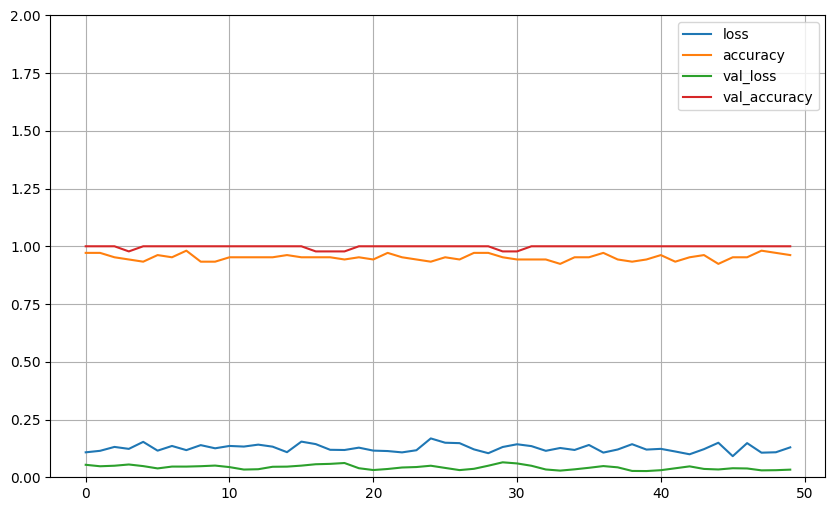

In [ ]:
# Plot the training and validation accuracy over epochs
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

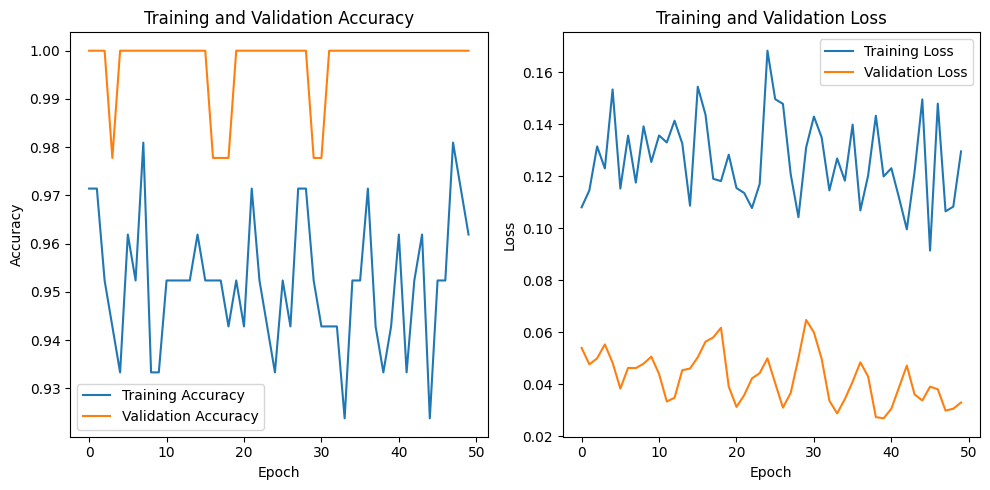

In [ ]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


//Comparing the overall accuracy of the three models that we used by Joel.

K-NN Accuracy: 0.9556
Decision Tree Accuracy: 0.9556


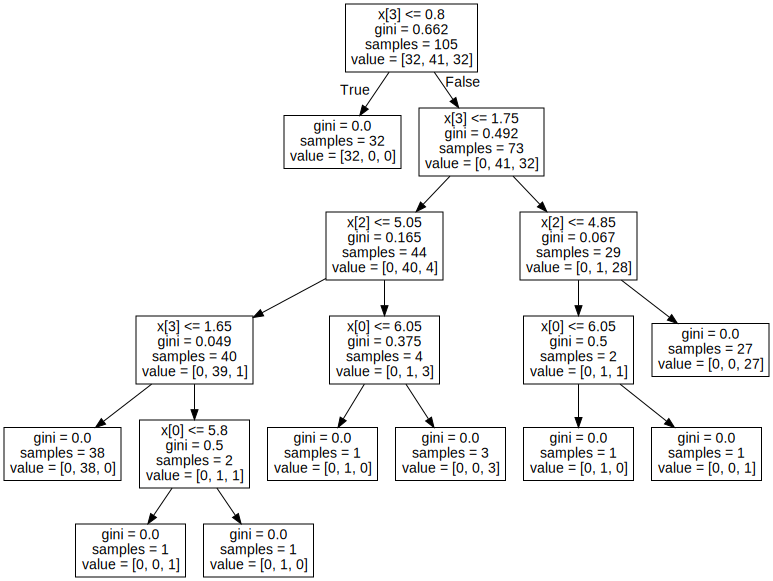

CNN Accuracy: 1.0000


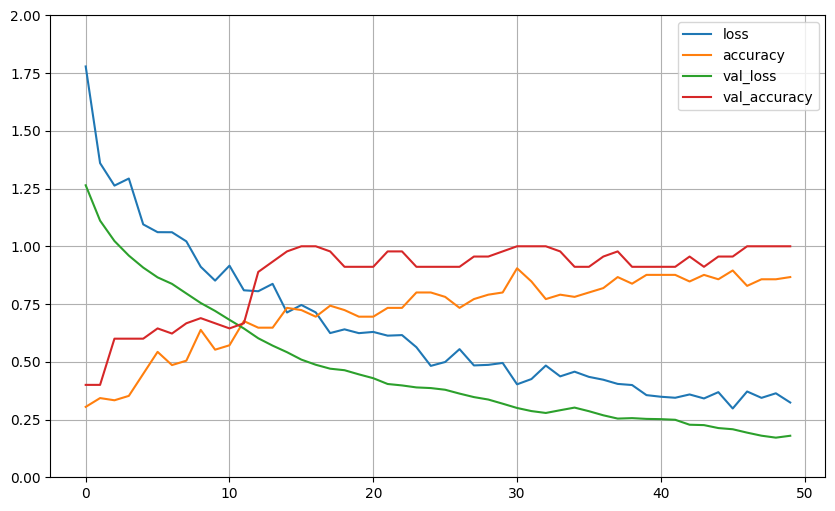

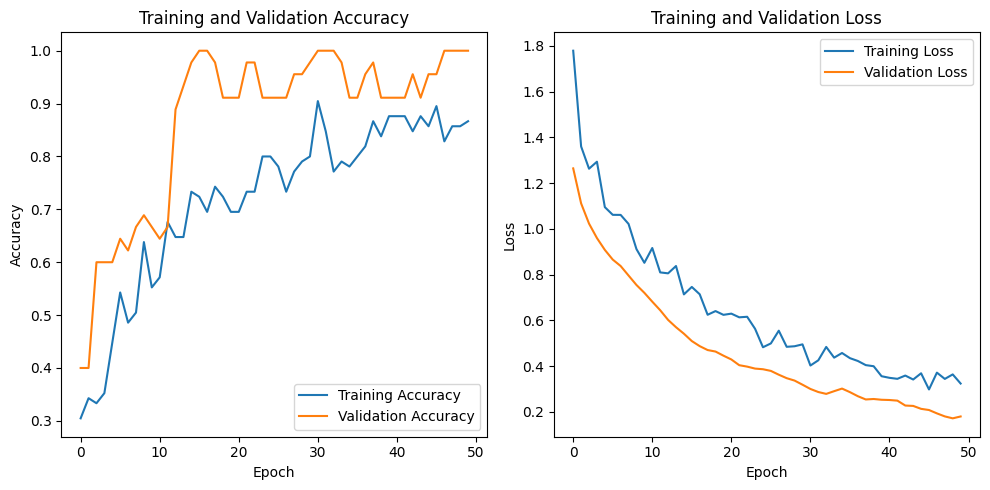


Comparison of Model Accuracies:
K-NN: 0.9556
Decision Tree: 0.9556
CNN: 1.0000


In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display

# Load the Iris dataset
iris = load_iris()
first_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Adding the species column to the dataset using classification
def categorize(a):
    if a == 0.0:
        return 'setosa'
    if a == 1.0:
        return 'versicolor'
    return 'virginica'

first_data['Species'] = first_data['target'].apply(categorize)

# Separate features and target
X = first_data.drop(['Species', 'target'], axis=1)  # Features
y = first_data['target']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

# Train and evaluate K-NN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
prediction_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, prediction_knn)
print(f"K-NN Accuracy: {accuracy_knn:.4f}")

# Train and evaluate Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
prediction_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, prediction_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# Visualise the Decision Tree
display(graphviz.Source(export_graphviz(dt)))

# Train and evaluate CNN
num_features = X_train.shape[1]

# Initialize the CNN model
cnn = Sequential([
    Dense(64, activation='relu', input_shape=(num_features,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

# Compile the CNN model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
history = cnn.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# Evaluate the CNN model
accuracy_cnn = cnn.evaluate(X_test, y_test, verbose=0)[1]
print(f"CNN Accuracy: {accuracy_cnn:.4f}")

# Plot training and validation accuracy and loss for CNN
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Compare the accuracies
print(f"\nComparison of Model Accuracies:\nK-NN: {accuracy_knn:.4f}\nDecision Tree: {accuracy_dt:.4f}\nCNN: {accuracy_cnn:.4f}")


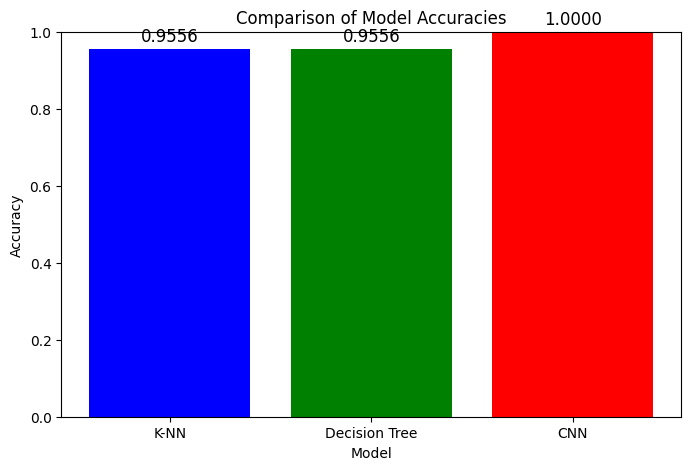

In [ ]:
# Compare the accuracies
accuracies = {
    'K-NN': accuracy_knn,
    'Decision Tree': accuracy_dt,
    'CNN': accuracy_cnn
}

# Plot the accuracies
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red'])
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=12)
plt.show()

Testing Different number of Epochs, Batch size and Learning Rate for CNN by Denilson

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
# Load the Iris dataset
iris = load_iris()
first_data = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                          columns=iris['feature_names'] + ['target'])

# Adding the species column to the dataset using classification
def categorize(a):
    if a == 0.0:
        return 'setosa'
    if a == 1.0:
        return 'versicolor'
    return 'virginica'

first_data['Species'] = first_data['target'].apply(categorize)

# Separate features and target
X = first_data.drop(['Species', 'target'], axis=1)  # Features
y = first_data['target']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)


In [ ]:
# Define and train the CNN model with the specified hyperparameters
num_features = X_train.shape[1]

model = Sequential([
    Dense(64, activation='relu', input_shape=(num_features,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=40, batch_size=20, validation_data=(X_test, y_test), verbose=1)
accuracy_cnn = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"CNN Accuracy: {accuracy_cnn:.4f}")


Epoch 1/40
6/6 [==============================] - 2s 69ms/step - loss: 1.0953 - accuracy: 0.4476 - val_loss: 0.6282 - val_accuracy: 0.8444
Epoch 2/40
6/6 [==============================] - 0s 8ms/step - loss: 0.6863 - accuracy: 0.6762 - val_loss: 0.3767 - val_accuracy: 0.8000
Epoch 3/40
6/6 [==============================] - 0s 8ms/step - loss: 0.5700 - accuracy: 0.7048 - val_loss: 0.3753 - val_accuracy: 0.8444
Epoch 4/40
6/6 [==============================] - 0s 10ms/step - loss: 0.4304 - accuracy: 0.8286 - val_loss: 0.2498 - val_accuracy: 1.0000
Epoch 5/40
6/6 [==============================] - 0s 9ms/step - loss: 0.3449 - accuracy: 0.8762 - val_loss: 0.1838 - val_accuracy: 1.0000
Epoch 6/40
6/6 [==============================] - 0s 8ms/step - loss: 0.3514 - accuracy: 0.8190 - val_loss: 0.1533 - val_accuracy: 1.0000
Epoch 7/40
6/6 [==============================] - 0s 9ms/step - loss: 0.3136 - accuracy: 0.8571 - val_loss: 0.1899 - val_accuracy: 0.9333
Epoch 8/40
6/6 [================

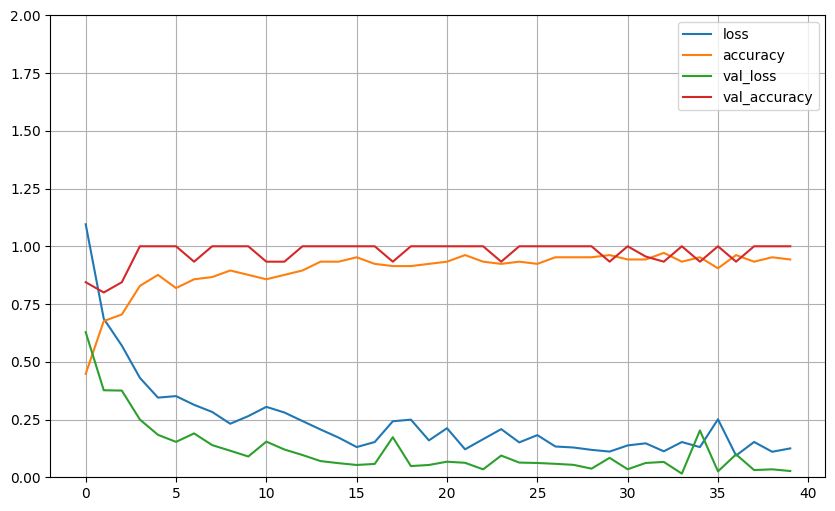

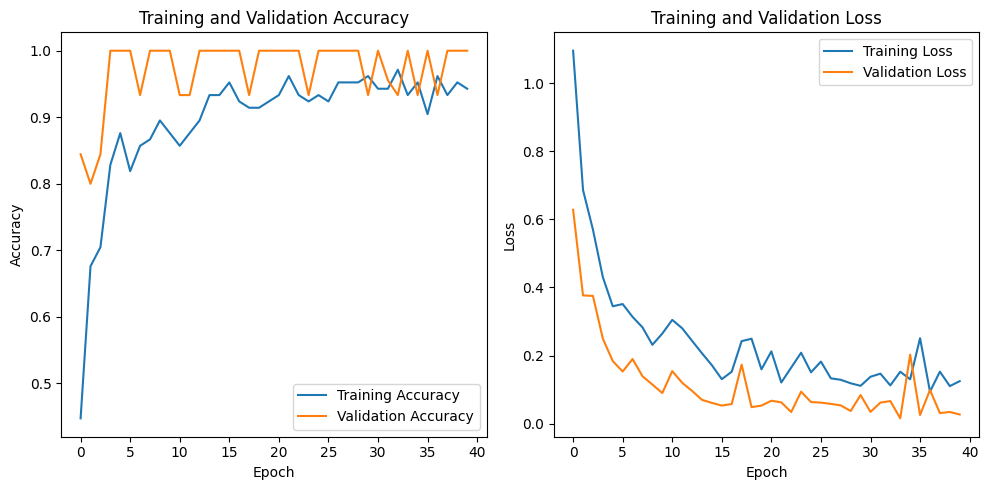

In [ ]:
# Plot training and validation accuracy and loss for CNN
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


Configuration: {'epochs': 50, 'batch_size': 32, 'learning_rate': 0.001}, Accuracy: 1.0000
Configuration: {'epochs': 100, 'batch_size': 32, 'learning_rate': 0.001}, Accuracy: 1.0000
Configuration: {'epochs': 50, 'batch_size': 64, 'learning_rate': 0.001}, Accuracy: 0.9778
Configuration: {'epochs': 50, 'batch_size': 32, 'learning_rate': 0.01}, Accuracy: 0.9333
Configuration: {'epochs': 100, 'batch_size': 64, 'learning_rate': 0.01}, Accuracy: 1.0000


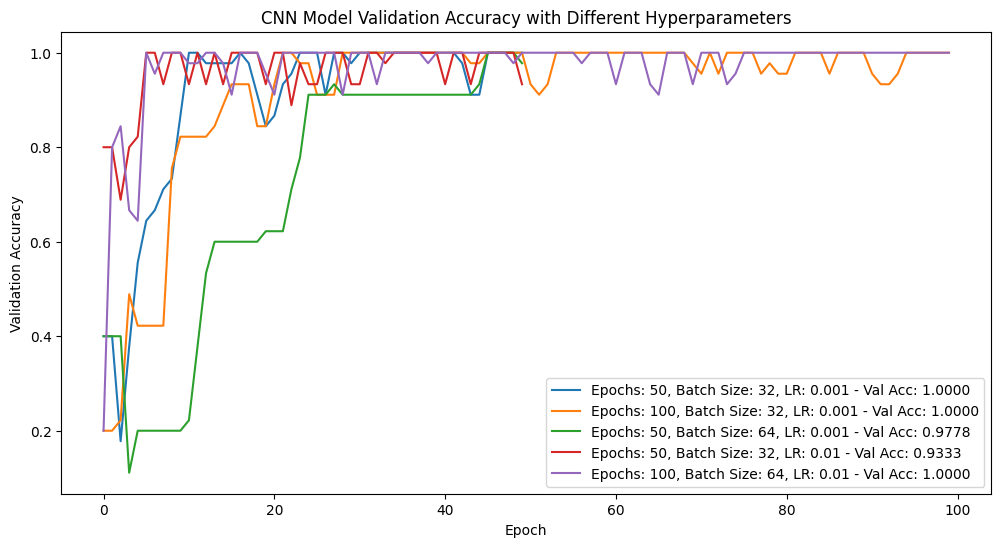

Configuration: {'epochs': 50, 'batch_size': 32, 'learning_rate': 0.001}, Accuracy: 1.0000
Configuration: {'epochs': 100, 'batch_size': 32, 'learning_rate': 0.001}, Accuracy: 1.0000
Configuration: {'epochs': 50, 'batch_size': 64, 'learning_rate': 0.001}, Accuracy: 0.9778
Configuration: {'epochs': 50, 'batch_size': 32, 'learning_rate': 0.01}, Accuracy: 0.9333
Configuration: {'epochs': 100, 'batch_size': 64, 'learning_rate': 0.01}, Accuracy: 1.0000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
first_data = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                          columns=iris['feature_names'] + ['target'])

# Adding the species column to the dataset using classification
def categorize(a):
    if a == 0.0:
        return 'setosa'
    if a == 1.0:
        return 'versicolor'
    return 'virginica'

first_data['Species'] = first_data['target'].apply(categorize)

# Separate features and target
X = first_data.drop(['Species', 'target'], axis=1)  # Features
y = first_data['target']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

# Define a function to create and train the CNN model with different hyperparameters
def train_cnn_model(epochs, batch_size, learning_rate):
    num_features = X_train.shape[1]

    model = Sequential([
        Dense(64, activation='relu', input_shape=(num_features,)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(3, activation='softmax')
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)
    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

    return accuracy, history

# Define different configurations to try
configurations = [
    {'epochs': 50, 'batch_size': 32, 'learning_rate': 0.001},
    {'epochs': 100, 'batch_size': 32, 'learning_rate': 0.001},
    {'epochs': 50, 'batch_size': 64, 'learning_rate': 0.001},
    {'epochs': 50, 'batch_size': 32, 'learning_rate': 0.01},
    {'epochs': 100, 'batch_size': 64, 'learning_rate': 0.01},
]

# Train and evaluate the model for each configuration
results = []

for config in configurations:
    accuracy, history = train_cnn_model(config['epochs'], config['batch_size'], config['learning_rate'])
    results.append((config, accuracy, history))
    print(f"Configuration: {config}, Accuracy: {accuracy:.4f}")

# Plot the results
plt.figure(figsize=(12, 6))
for config, accuracy, history in results:
    label = f"Epochs: {config['epochs']}, Batch Size: {config['batch_size']}, LR: {config['learning_rate']}"
    plt.plot(history.history['val_accuracy'], label=f"{label} - Val Acc: {accuracy:.4f}")

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('CNN Model Validation Accuracy with Different Hyperparameters')
plt.legend()
plt.show()

# Print final comparison
for config, accuracy, history in results:
    print(f"Configuration: {config}, Accuracy: {accuracy:.4f}")
